### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [60]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
url = r'https://raw.githubusercontent.com/belinda2201/Data-Mining/refs/heads/main/MBA.csv'
df = pd.read_csv(url)

1. display 5 columns from dataset

In [62]:
#1
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [63]:
#2
df.info()
#conclusion
print("\nThe data has 6194 entries, contains 10 collumns, and indexed by a RangeIndex from 0 to 6193.\nThe collumns are :\n- 1 boolean column (international)\n- 3 float columns (gpa, gmat, work_exp)\n- 1 integer column (application_id)\n- 5 object columns (gender, major, race, work_industry, admission)\nThe race and admission columns have missing values, with 4352 and 1000 non-null values, respectively.\nThe total memory usage of the DataFrame is approximately 441.7 KB.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB

The data has 6194 entries, contains 10 collumns, and indexed by a RangeIndex from 0 to 6193.
The collumns are :
- 1 boolean column (international)
- 3 float columns (gpa, gmat, work_exp)
- 1 integer column (application_id)
- 5 object columns (gender, major, race, work_industry, 

3. display the number of each unique value in the race and admission columns (including NaN)

In [64]:
#3a
print("Admission")
print(df['admission'].value_counts(dropna=False))

Admission
NaN         5194
Admit        900
Waitlist     100
Name: admission, dtype: int64


In [65]:
#3b
print("Race")
print(df['race'].value_counts(dropna=False))

Race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: race, dtype: int64


<ipython-input-229-4c52867b0f1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)
<ipython-input-229-4c52867b0f1c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna('Other', inplace=True)

4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [66]:
#4
df['admission'].fillna('deny', inplace=True)
df['race'].fillna('other', inplace=True)

5. recheck missing value

In [67]:
#5
df.isnull().sum()

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

6. drop application_id column

In [68]:
# 6
df.drop(columns=['application_id'],inplace=True)

7. show describe column and conclude what the insight is from that column

In [69]:
#7
df.describe()


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


In [70]:
#conclusion
print("The data suggests that the students have a relatively high GPA and GMAT scores, with a moderate amount of work experience.\nAll three variables have a relatively normal distribution, with the median (50%) close to the mean.")

The data suggests that the students have a relatively high GPA and GMAT scores, with a moderate amount of work experience.
All three variables have a relatively normal distribution, with the median (50%) close to the mean.


8. make a visualization to analyze admission status based on major and explain the conclusions

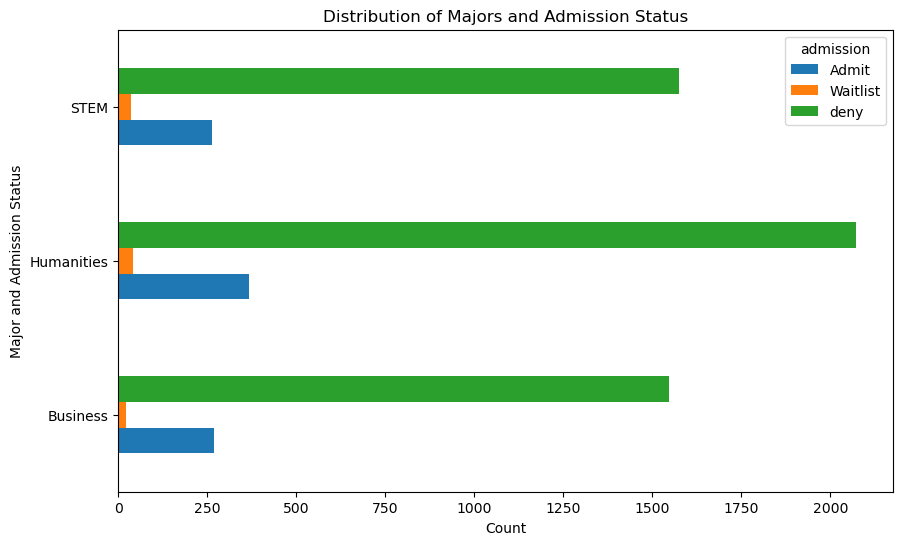

In [71]:
#8

# Group data by major and admission status, then count the occurrences
group = df.groupby(['major', 'admission'])['admission'].count().unstack()

# Create a horizontal bar chart
group.plot (kind='barh', figsize=(10,6))

# Customize the chart
plt.xlabel('Count')
plt.ylabel('Major and Admission Status')
plt.title('Distribution of Majors and Admission Status')

# Show the chart
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

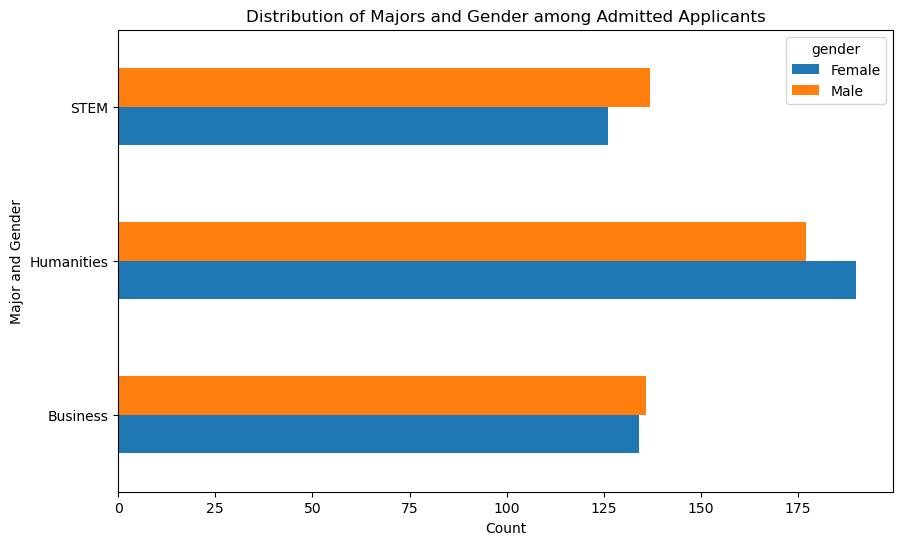

In [72]:
#9

# Filter the DataFrame to include only admitted applicants
admitted_applications = df[df['admission'] == 'Admit']

# Group data by major and gender, then count the occurrences
group_second = admitted_applications.groupby(['major', 'gender'])['gender'].count().unstack()

# Create a horizontal bar chart
group_second.plot (kind='barh', figsize=(10,6))

# Customize the chart
plt.xlabel('Count')
plt.ylabel('Major and Gender')
plt.title('Distribution of Majors and Gender among Admitted Applicants')

# Show the chart
plt.show()

#In Humanities major, the majority of the applicants are female.
#In STEM major, the majority of the applicants are male.
#In Business major, the applicants are on semi-tie between male and femalle

10. create your own insightful visualization and explain it in at least 2 sentences

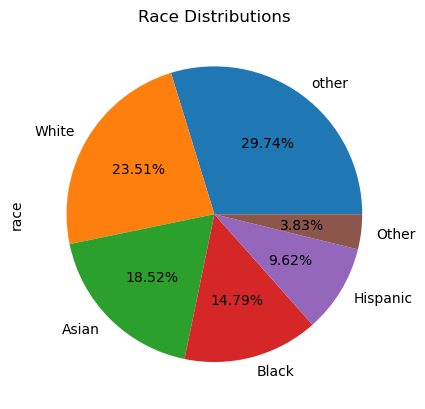

In [73]:
#10
data = df['race'].value_counts()
data.plot(kind='pie', autopct='%1.2f%%', title='Race Distributions')
plt.show()

#In this pie chart, it shows the distribution of races in the data. Disclaimer, I'm not being racist ok :)
#From this chart, the majority of the race is actually the 'other' race, probably wether the applicant doesn't want to tell their race or maybe their race is just not in the selection.

11. create your own insightful visualization and explain it in at least 2 sentences

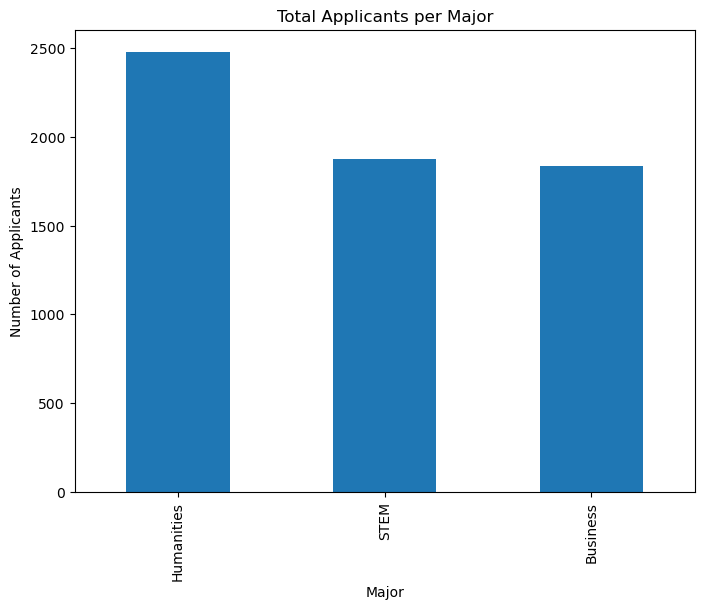

In [76]:
#11
major_counts = df['major'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
major_counts.plot(kind='bar')
plt.title('Total Applicants per Major')
plt.xlabel('Major')
plt.ylabel('Number of Applicants')
plt.show()

# From this chart, we can see which major is in the high demand, and which major isn't.
# The majority of the applicants are applying for Humanities, while Business has the least applicant.

12. encode categorical columns and display the results

In [77]:
from sklearn.preprocessing import LabelEncoder

In [94]:
#12
# Encode categorical columns (except the admission column)
df['admission'] = df['admission'].fillna('deny')

label_encoders = {}
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']  # Columns you want to encode
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


In [95]:
# Encode the admission column
admission_le = LabelEncoder()

df['admission'] = admission_le.fit_transform(df['admission'])
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

                 gender  international       gpa     major      race  \
gender         1.000000       0.007646  0.022210  0.025773  0.006240   
international  0.007646       1.000000 -0.028540 -0.007301  0.710025   
gpa            0.022210      -0.028540  1.000000 -0.006697 -0.026933   
major          0.025773      -0.007301 -0.006697  1.000000 -0.015330   
race           0.006240       0.710025 -0.026933 -0.015330  1.000000   
gmat           0.022815      -0.014784  0.577539  0.003594 -0.022473   
work_exp      -0.007427      -0.010341  0.000346  0.006741  0.002930   
work_industry  0.001822      -0.001282 -0.009687  0.014921 -0.007882   
admission      0.122788      -0.010440 -0.290997  0.003042 -0.027166   

                   gmat  work_exp  work_industry  admission  
gender         0.022815 -0.007427       0.001822   0.122788  
international -0.014784 -0.010341      -0.001282  -0.010440  
gpa            0.577539  0.000346      -0.009687  -0.290997  
major          0.003594  0.0067

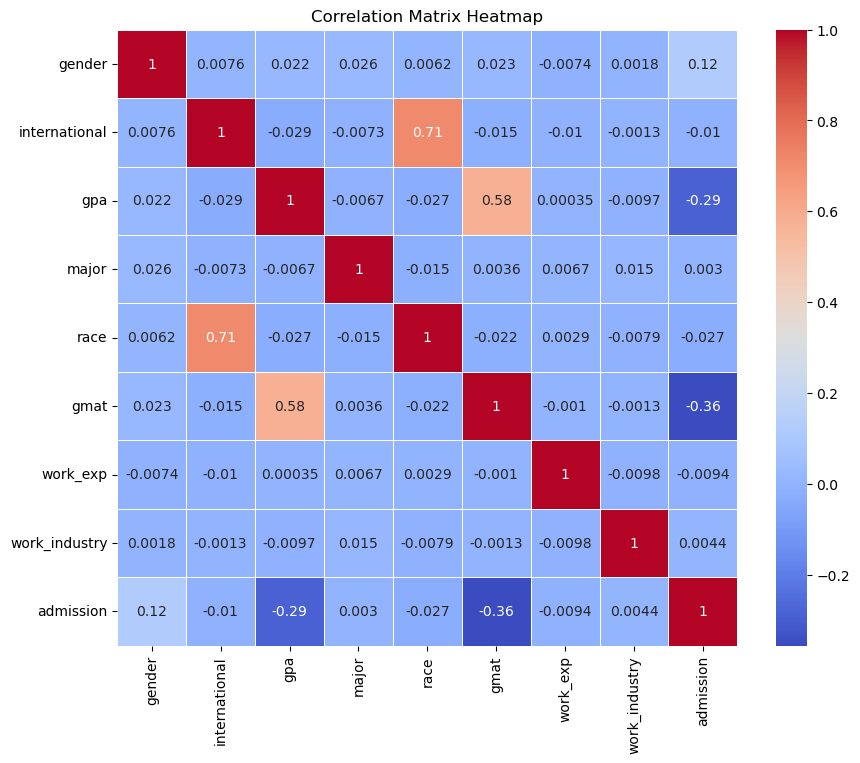

In [96]:
#13

# Calculate the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
#Conclusion


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [98]:
# prompt: make a model classification

# Separate features and target variable
# GPA : Average of all applicants
# Major : Entrepreneurship
# Race : Asian
# GMAT : 580
# WorkEXP : 2 years
# Work Industry : Finance


# Split the data into training and testing sets
X = df.drop('admission', axis=1)
y = df['admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7820823244552058
Precision: 0.4529301638096867
Recall: 0.4728626735246944
F1 Score: 0.45979131615753127


In [103]:
# Get the average GPA
average_gpa = df['gpa'].mean()
# Create a dictionary to store the LabelEncoders
le_dict = {}

# Create a LabelEncoder for each categorical feature
for col in ['gender', 'international', 'major', 'race', 'work_industry', 'admission']:
    le = LabelEncoder()
    le.fit(df[col])
    le_dict[col] = le

# Create Lisa's data as a dictionary
lisa_data = {
    'gender': le_dict['gender'].transform([df['gender'].unique()[0]])[0],  # Assuming Female is the first value
    'international': le_dict['international'].transform([df['international'].unique()[0]])[0],  # Assuming local (No)
    'gpa': average_gpa,  # The average GPA of all applicants
    'major': le_dict['major'].transform([df['major'].unique()[1]])[0],  # Assuming Entrepreneurship or similar
    'race': le_dict['race'].transform([df['race'].unique()[0]])[0],  # Assuming Asian or similar
    'gmat': 580,  # Lisa's GMAT score
    'work_exp': 2,  # Lisa worked from 2018 to 2020 (2 years of work experience)
    'work_industry': le_dict['work_industry'].transform([df['work_industry'].unique()[2]])[0],  # Assuming Finance
}

# Create a DataFrame with Lisa's data
lisa_df = pd.DataFrame([lisa_data])

# Make a prediction using the trained model
lisa_prediction = clf.predict(lisa_df)

# Decode the prediction back to the original label
lisa_admission_status = le_dict['admission'].inverse_transform(lisa_prediction)[0]
print(f"Prediction for Lisa: {'Accepted' if lisa_admission_status == 'Admit' else 'Denied'}")

Prediction for Lisa: Denied
